In [259]:
import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import urllib
from pprint import pprint

In [260]:
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        #elif type(x) is list:
        #    i = 0
        #    for a in x:
        #        flatten(a, name + str(i) + '_')
        #       i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

In [261]:
def get_data(url,**kwargs):
    url_params = "?"+urllib.parse.urlencode(kwargs)
    acctual_url = urllib.parse.urljoin(url,url_params)
    response = requests.get(acctual_url)
    num_pages = response.json()["last_page"]
    data = []
    for page in range(2,num_pages +1):
        url_current = acctual_url + f"&page={page}"
        response = requests.get(url_current)
        data += response.json()["data"]["data"]

    flatten_data = [flatten_json(d) for d in data]
    return pd.DataFrame(flatten_data)

In [403]:
def results(x):
    records = x.drop(columns=['category', 'final',"ctype","group_name","group_pk","individual_name",'individual_pk']).to_dict("list")
    for key,value in records.items():
        if len(value) == 1:
            records[key] = value[0]
        elif not any(value):
            records[key] = None
        else:
             records[key] = tuple(value)
        


    return records

In [336]:
def get_slug_group_pks(df):
    group_pks_pd = df.group_pk.dropna()
    group_pks = list(group_pks_pd.astype(int).astype(str).unique())
    return "__".join(group_pks)

def get_slug_individual_pks(df):
    individual_pks_pd = df.individual_pk.dropna()
    individual_pks = list(individual_pks_pd.astype(int).astype(str).unique())
    return "__".join(individual_pks)  



In [337]:
#example_params
#characteristica_params = {"choice":"F"}
#output_params = {"substance":"coffeine","pktype":"clearance"}

In [338]:
url_characteristica = "http://0.0.0.0:8000/api/v1/characteristica_elastic/"
url_outputs = "http://0.0.0.0:8000/api/v1/outputs_elastic/"
url_interventions = "http://0.0.0.0:8000/api/v1/interventions_elastic/"

base_params = {"format":"json", "final":"true"}

characteristica_params = {**base_params,**characteristica_params}


df_characteristica = get_data(url_characteristica,**characteristica_params)


In [339]:
#slug_group_pks = get_slug_group_pks(df_characteristica)
#slug_individual_pks = get_slug_individual_pks(df_characteristica)

#output_params_group = {**base_params,"group_pk__in":slug_group_pks}
#output_params_individual = {**base_params,"individual_pk__in":slug_individual_pks}

#df_outputs_group = get_data(url_outputs,**output_params_group)
#df_outputs_individual = get_data(url_outputs,**output_params_individual)
#df_outputs = df_outputs_group.append(df_outputs_individual)

df_outputs = get_data(url_outputs,**base_params)


In [468]:
df_outputs.to_csv("outputs.tsv", sep="\t")


In [404]:
df_indivduals = df_characteristica.pivot_table(columns=["category"], index=["individual_pk"], aggfunc=results)
df_groups = df_characteristica.pivot_table(columns=["category"], index=["group_pk"], aggfunc=results)

In [470]:
df_characteristica_pivoted = df_groups.reset_index().append(df_indivduals.reset_index())
df_characteristica_pivoted.to_csv("characteristica.tsv", sep="\t")


In [406]:
df_outputs_characteristica = pd.merge(df_outputs,df_characteristica_pivoted,  how='left', on=['individual_pk','group_pk'])

In [407]:
df_outputs_characteristica.to_csv("outputs_characteristica", sep="\t")

In [408]:
df_output_characteristica_flat = pd.DataFrame([flatten_json(row) for row in df_outputs_characteristica.to_dict("records")])

In [409]:
df_output_characteristica_flat.dropna(axis=1,how="all").to_csv("outputs_characteristica_flat", sep="\t" )

In [410]:
df_output_characteristica_flat

,CYP2D6 genotype,HbA1c,abstinence,abstinence_choice,abstinence_count,abstinence_cv,abstinence_max,abstinence_mean,abstinence_median,abstinence_min,...,weight_count,weight_cv,weight_max,weight_mean,weight_median,weight_min,weight_sd,weight_se,weight_unit,weight_value
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,CYP2D6 genotype,HbA1c,abstinence,abstinence_choice,abstinence_count,abstinence_cv,abstinence_max,abstinence_mean,abstinence_median,abstinence_min,...,weight_count,weight_cv,weight_max,weight_mean,weight_median,weight_min,weight_sd,weight_se,weight_unit,weight_value
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,caffeine,30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


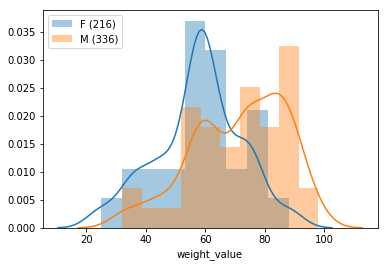

In [466]:
for name, group in df_output_characteristica_flat.groupby("sex_choice"):
   
    bodyweight = group["weight_value"].dropna()
    if len(group["weight_value"].dropna())>0:
        sns.distplot(bodyweight,label=f"{name} ({len(bodyweight)})",kde_kws={'clip': (0.0,100000 )})
_ = plt.legend()     

In [ ]:
df_output_characteristica_flat

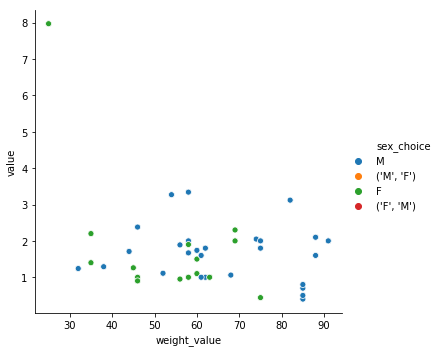

In [450]:
data =  df_output_characteristica_flat[df_output_characteristica_flat.pktype=="clearance"]
data = data[data.unit=="ml/min/kg"]
data["value"] = data["value"].astype(float) 
ax = sns.relplot(aspect=20/20,height=5, x="weight_value", y="value", hue="sex_choice", data=data)


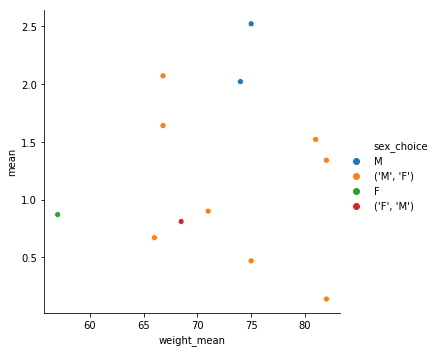

In [452]:
data["mean"] = data["mean"].astype(float) 

ax = sns.relplot(aspect=20/20,height=5, x="weight_mean", y="mean", hue="sex_choice", data=data)
